In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
class Bandit():
    
    def __init__(self, n):
        self.n_actions = n
        self.q_star = np.random.normal(size=n_actions)
        
    def get_reward(self, action):
        return self.q_star[action] + np.random.normal()
    
    def optimal_action(self):
        return np.argmax(self.q_star)
        
class Agent():
    
    def __init__(self, bandit, epsilon):
        self.bandit = bandit
        self.n_actions = self.bandit.n_actions
        self.q_val = np.random.uniform(0, 1e-5, self.n_actions)
        self.num_actions = np.zeros(self.n_actions)
        self.epsilon = epsilon
        
    def choose_action(self):
        p = np.random.uniform()
        
        if p > self.epsilon:
            action = np.argmax(self.q_val)
        else:
            action = np.random.choice(self.n_actions)
            
        return action
    
    def update_value_function(self, reward, action):
        self.num_actions[action] += 1
        self.q_val[action] += (reward - self.q_val[action])/(self.num_actions[action]*1.0)

In [3]:
def run_experiment(runs, time_steps, n_actions, epsilon):
    
    exp_reward = np.zeros((runs, time_steps))
    opt_choice = np.zeros((runs, time_steps))
    
    for i in range(runs):
        bandit = Bandit(n_actions)
        agent = Agent(bandit, epsilon)
        
        for j in range(time_steps):
            
            action = agent.choose_action()
            reward = bandit.get_reward(action)
            agent.update_value_function(reward, action)
            
            exp_reward[i,j] = reward
            opt_choice[i,j] = (action == bandit.optimal_action())*100
            
            
    exp_reward = np.mean(exp_reward, 0)
    opt_choice = np.mean(opt_choice, 0)
    
    return [exp_reward, opt_choice]

In [4]:
prob = [0, 0.01, 0.1]
runs = 2000
time_steps = 1000
n_actions = 10

reward_log = []
choice_log = []

for epsilon in prob:
    
    exp_reward, opt_choice = run_experiment(runs, time_steps, n_actions, epsilon)
    
    reward_log.append(exp_reward)
    choice_log.append(opt_choice)  

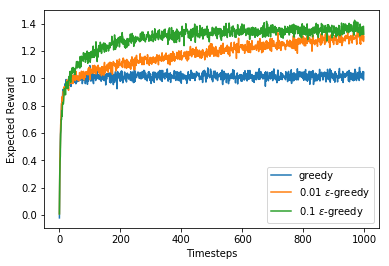

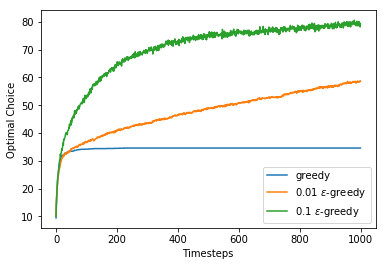

In [5]:
for i in reward_log:
    plt.plot(i)
    plt.hold(True)
plt.xlabel('Timesteps')
plt.ylabel('Expected Reward')
plt.legend(['greedy', '0.01 $\epsilon$-greedy', '0.1 $\epsilon$-greedy'])
plt.show()

for i in choice_log:
    plt.plot(i)
    plt.hold(True)
plt.xlabel('Timesteps')
plt.ylabel('Optimal Choice')
plt.legend(['greedy', '0.01 $\epsilon$-greedy', '0.1 $\epsilon$-greedy'])
plt.show()